# Experimentando classificação com diferentes _datasets_

Utilizando o dataset de toras previamente cortadas para treino.

Utilizando o dataset de toras cortadas pelos algoritmos de preprocessamento em `./img_edit.py`.

Utilizando melhor combinação de fatores para calculo do LBP:
  - utilizando 8 p

## Importando bibliotecas

## Analisando desempenho com KNN

> Descomente _imports_ caso não tenha executado células superiores

In [1]:
# # importado de células anteriores
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearnex import patch_sklearn
patch_sklearn() # Deve ser chamada antes dos imports no sklearn

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


TESTE = 5
TREINO = 6

N_POINTS = [4, 8]
FUNC_NAMES = ['ambos', 'menor', 'maior']
TARGET_NAMES = ['normal', 'broca', 'fissura', 'musgo'] # Já declarado anteriormente

# Gerando 30 sementes "aleatórias" dentro do intervalo [0, 8000)
seed_arr = np.random.randint(8000, size=30)
seed_arr

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


array([6218, 7235, 7010, 4230, 5099, 4292, 7660, 7492, 7491, 7415, 3035,
       7635, 3569, 6720, 5397, 5192, 3359,   49, 4157, 5824, 6713, 2446,
       4430, 2457, 4251, 5582, 3798, 4653, 7907, 2892])

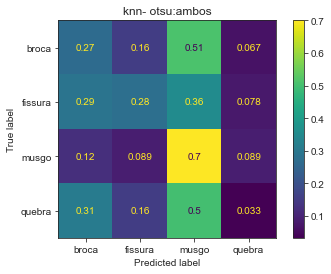

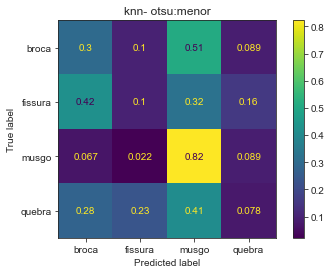

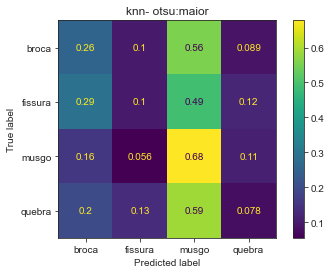

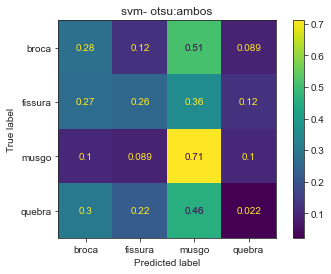

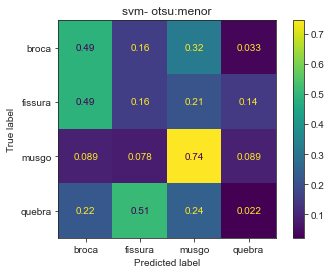

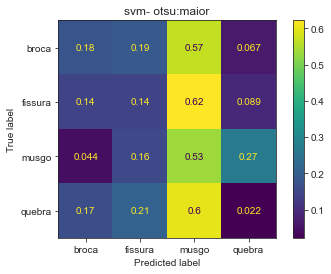

In [4]:
sns.set_style('ticks')

COLUMNS = ['acc', 'otsu', 'pontos', 'classificador']
combinations = []

# fig, ax = plt.subplots(nrows=2, ncols=3)

for i, classifier in enumerate(['knn', 'svm']):
  for n_points in [8]:
    for j, name in enumerate(FUNC_NAMES):
      # classes: {0:'broca', 1:'fissura', 2:'musgo', 3:'quebra'}
      data_treino = pd.read_csv(f'./csvs/prepro_{TREINO}-{name}-P{n_points}.csv')
      y_train = data_treino.pop('target').values
      X_train = data_treino.values

      # classes: {0:'normal', 1:'broca', 2:'fissura', 3:'musgo'}
      data_teste = pd.read_csv(f'./csvs/prepro_{TESTE}-{name}-P{n_points}.csv')
      y_test = data_teste.pop('target').values
      X_test = data_teste.values

      # classes: {3:'normal', 0:'broca', 1:'fissura', 2:'musgo'}
      y_test = (y_test - 1) % 4 # corrigindo valores das classes para correspondência entre datasets

      # Instanciando classificador

      clf = KNeighborsClassifier() if classifier == 'knn' else make_pipeline(StandardScaler(), SVC(cache_size=600))
      clf.fit(X_train, y_train)

      combinations.append([
        clf.score(X_test, y_test),
        name,
        n_points,
        classifier])

      ConfusionMatrixDisplay.from_estimator(
        estimator=clf,
        X=X_test,
        y=y_test,
        normalize='true',
        display_labels=['broca', 'fissura', 'musgo', 'quebra']
        ).ax_.set(title=f'{classifier}- otsu:{name}')

plt.show()


,acc,otsu,pontos,classificador
0,0.319444,ambos,8,knn
1,0.325000,menor,8,knn
2,0.277778,maior,8,knn
3,0.316667,ambos,8,svm
4,0.352778,menor,8,svm
5,0.219444,maior,8,svm


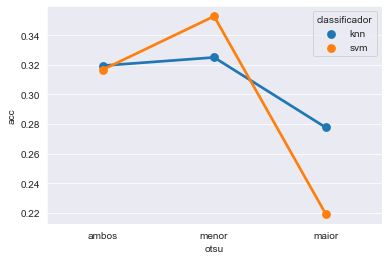

In [3]:
df = pd.DataFrame(data=combinations, columns=COLUMNS)

sns.set_style('darkgrid')
sns.pointplot(
  data=df,
  x='otsu',
  y='acc',
  hue='classificador'
)

df